# Aula 16 - SVM


In [ ]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

In [ ]:
# Carregar os dados e monta o dataframe
breast = load_breast_cancer()

breast_data = breast.data
breast_labels = breast.target

labels = np.reshape(breast_labels, (569, 1))

final = np.concatenate( [breast_data, labels], axis=1 )

colunas = list(breast.feature_names)
colunas.append("label")

df = pd.DataFrame(final, columns=colunas)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Separar treino e teste
from sklearn.model_selection import train_test_split

X = df.drop(columns=["label"])
Y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=101)

In [ ]:
# Padroniza os dados
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Cria o SVM
from sklearn import svm

model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# Avaliações
from sklearn import metrics

print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
metrics.plot_confusion_matrix(model, X_test, y_test, cmap="Blues")

Acurácia:  0.9766081871345029


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


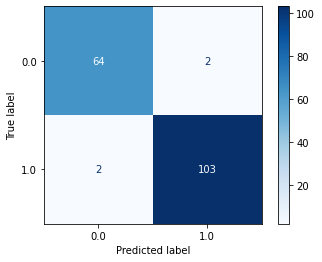